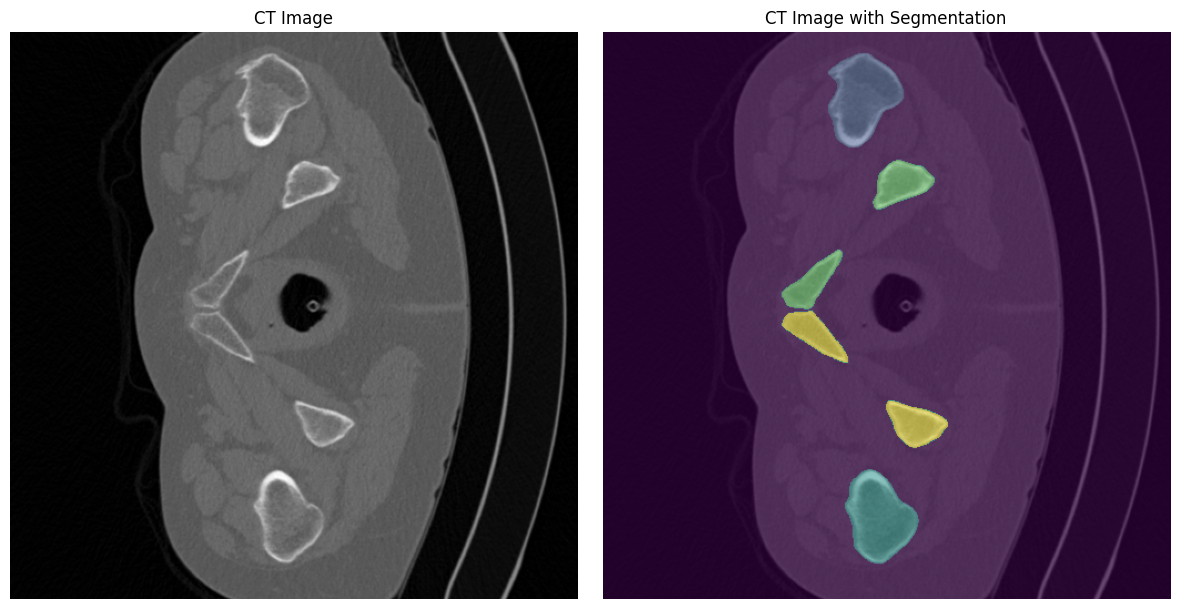

In [27]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Path to the NIfTI files
ct_image_path = r"C:\Users\Serge\Documents\Projet3D_2\Project3D_2\Dataset\COMMON_images_masks\common_40_image.nii.gz" 
mask_path = r"C:\Users\Serge\Documents\Projet3D_2\Project3D_2\Dataset\COMMON_images_masks\common_40_mask.nii.gz"
# ct_image_path = r"C:\Users\Serge\Documents\Projet3D_2\Project3D_2\Dataset\GROUP_images\g1_54_image.nii.gz"

ct_image = nib.load(ct_image_path).get_fdata()
mask = nib.load(mask_path).get_fdata()

def visualize_slice_and_mask(ct_image, mask, slice_idx):
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.imshow(ct_image[:, :, slice_idx], cmap="gray")
    plt.title("CT Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(ct_image[:, :, slice_idx], cmap="gray")
    plt.imshow(mask[:, :, slice_idx], alpha=0.5)
    plt.title("CT Image with Segmentation")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


slice_idx = ct_image.shape[2] // 2 -100
visualize_slice_and_mask(ct_image, mask, slice_idx)


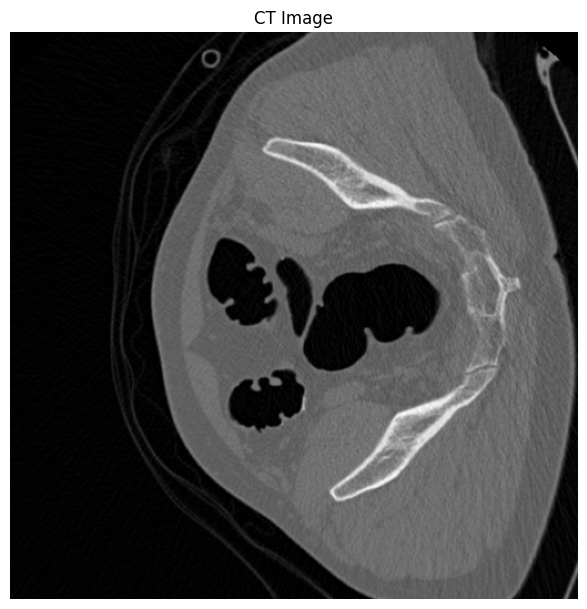

In [28]:
def visualize_slice(ct_image, slice_idx):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(ct_image[:, :, slice_idx], cmap="gray")
    plt.title("CT Image")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

ct_image_path = r"C:\Users\Serge\Documents\Projet3D_2\Project3D_2\Dataset\GROUP_images\g1_55_image.nii.gz" 
ct_image = nib.load(ct_image_path).get_fdata()
slice_idx = ct_image.shape[2] // 2
visualize_slice(ct_image,slice_idx)

# There is two types of dataset :

* First one : COMMON => 3 patients/CT scans that are already segmented => We have to segment the left femur and hip bones

* Second one : GROUP => We can take groupe 1 files = 3 patients/CT scans : they are not segmented at all, we have to do the segmentation manually

In [ ]:
import os

common_dir = r"C:\Users\Serge\Documents\Projet3D_2\Project3D_2\Dataset\COMMON_images_masks" 
output_dir = r"C:\Users\Serge\Documents\Projet3D_2\Project3D_2\Dataset\Output_mask"  

os.makedirs(output_dir, exist_ok=True)


LEFT_FEMUR = 2  
LEFT_HIP_BONE = 4  
RIGHT_HIP_BONE = 3

mask_files = [f for f in os.listdir(common_dir) if "_mask.nii" in f]

# Processus de segmentation
for mask_file in mask_files:
    print(f"Traitement du fichier {mask_file}...")
    
    
    mask_path = os.path.join(common_dir, mask_file)
    mask_nii = nib.load(mask_path)
    mask_data = mask_nii.get_fdata()
    
    
    new_mask = np.zeros_like(mask_data)
    new_mask[mask_data == LEFT_FEMUR] = 1  
    new_mask[mask_data == LEFT_HIP_BONE] = 2 
    new_mask[mask_data == RIGHT_HIP_BONE] = 3
    
    # Enregistrer le nouveau masque
    new_mask_nii = nib.Nifti1Image(new_mask, mask_nii.affine, mask_nii.header)
    output_path = os.path.join(output_dir, f"filtered_{mask_file}")
    nib.save(new_mask_nii, output_path)
    print(f"Masque filtré enregistré : {output_path}")


Traitement du fichier common_40_mask.nii.gz...
Masque filtré enregistré : C:\Users\Serge\Documents\Projet3D_2\Project3D_2\Dataset\Output_mask\filtered_common_40_mask.nii.gz
Traitement du fichier common_41_mask.nii.gz...
Masque filtré enregistré : C:\Users\Serge\Documents\Projet3D_2\Project3D_2\Dataset\Output_mask\filtered_common_41_mask.nii.gz
Traitement du fichier common_43_mask.nii.gz...
Masque filtré enregistré : C:\Users\Serge\Documents\Projet3D_2\Project3D_2\Dataset\Output_mask\filtered_common_43_mask.nii.gz


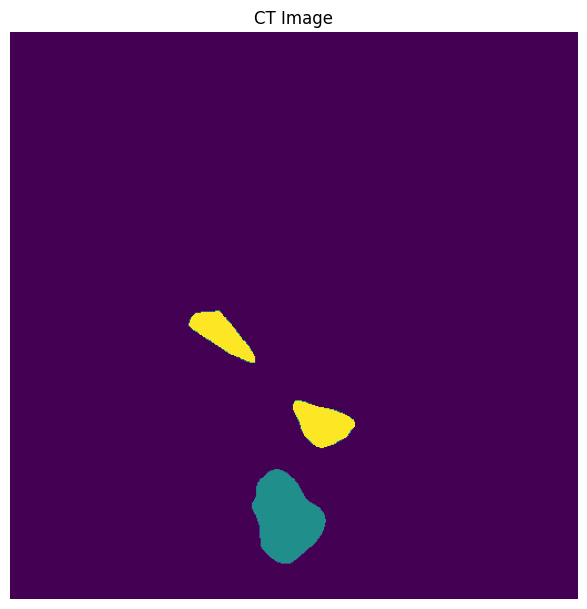

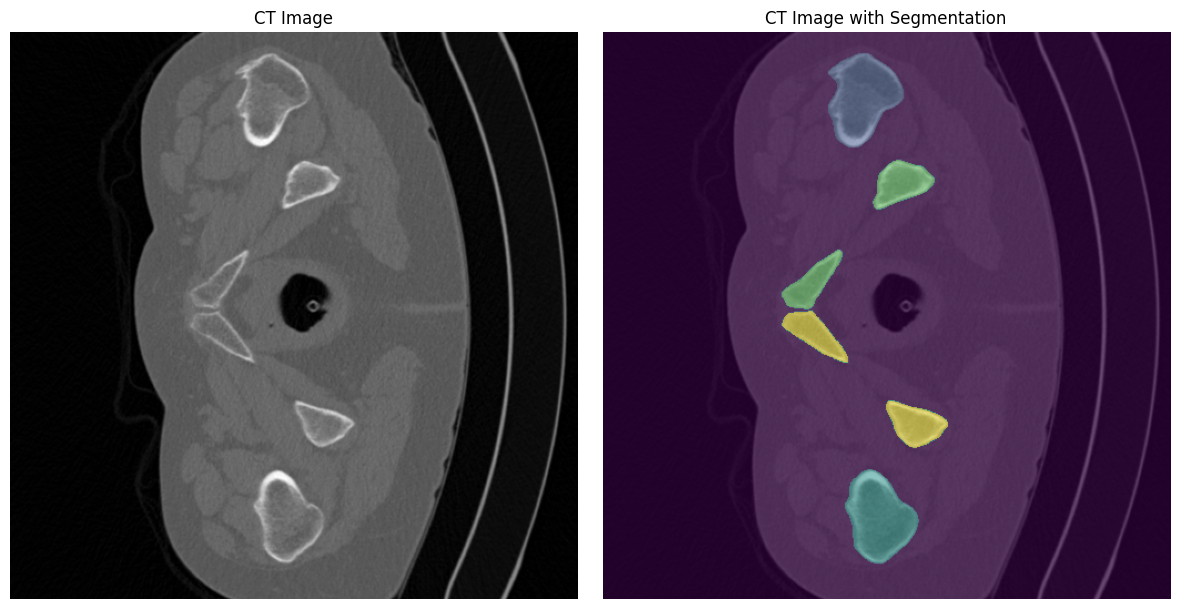

In [30]:
def visualize_slice(ct_image, slice_idx):
    plt.figure(figsize=(12, 6))

    # CT Image
    plt.subplot(1, 2, 1)
    plt.imshow(ct_image[:, :, slice_idx])
    plt.title("CT Image")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

ct_image_path = r"C:\Users\Serge\Documents\Projet3D_2\Project3D_2\Dataset\Output_mask\filtered_common_40_mask.nii.gz" 
ct_image = nib.load(ct_image_path).get_fdata()
slice_idx = ct_image.shape[2] // 2 -100
visualize_slice(ct_image,slice_idx)
ct_image_path = r"C:\Users\Serge\Documents\Projet3D_2\Project3D_2\Dataset\COMMON_images_masks\common_40_image.nii.gz" 
ct_image = nib.load(ct_image_path).get_fdata()
mask_path = r"C:\Users\Serge\Documents\Projet3D_2\Project3D_2\Dataset\COMMON_images_masks\common_40_mask.nii.gz"
mask = nib.load(mask_path).get_fdata()
visualize_slice_and_mask(ct_image, mask, slice_idx)